# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

from pprint import pprint
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for k in lat_lngs:
    city = citipy.nearest_city(k[0], k[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")


Number of cities in the list: 619


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL

url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

## Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = query_url+city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country'][0]
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | atuona
Processing Record 2 of Set 1 | namatanai
Processing Record 3 of Set 1 | hailar
Processing Record 4 of Set 1 | nanortalik
Processing Record 5 of Set 1 | porto novo
Processing Record 6 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 7 of Set 1 | belushya guba
City not found. Skipping...
Processing Record 8 of Set 1 | hobart
Processing Record 9 of Set 1 | aguimes
Processing Record 10 of Set 1 | ushuaia
Processing Record 11 of Set 1 | ledyard
Processing Record 12 of Set 1 | cidreira
Processing Record 13 of Set 1 | lagoa
Processing Record 14 of Set 1 | alofi
Processing Record 15 of Set 1 | bluff
Processing Record 16 of Set 1 | qaanaaq
Processing Record 17 of Set 1 | east london
Processing Record 18 of Set 1 | ugoofaaru
Processing Record 19 of Set 1 | aklavik
Processing Record 20 of Set 1 | cape town
Processing Record 21 of Set 1 | ballina
Processing Record 22 of Set 1 | busse

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          569
Lat           569
Lng           569
Max Temp      569
Humidity      569
Cloudiness    569
Wind Speed    569
Country       569
Date          569
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,atuona,-9.8000,-139.0333,26.13,76,22,7.43,P,1675829422
1,namatanai,-3.6667,152.4333,29.76,64,90,4.76,P,1675829423
2,hailar,49.2000,119.7000,-18.33,94,96,1.38,C,1675829423
3,nanortalik,60.1432,-45.2371,-15.45,75,11,7.06,G,1675829424
4,porto novo,6.4965,2.6036,25.24,86,96,1.89,B,1675829425


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv('output_data/cities.csv', index_label='City_ID')

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,atuona,-9.8000,-139.0333,26.13,76,22,7.43,P,1675829422
1,namatanai,-3.6667,152.4333,29.76,64,90,4.76,P,1675829423
2,hailar,49.2000,119.7000,-18.33,94,96,1.38,C,1675829423
3,nanortalik,60.1432,-45.2371,-15.45,75,11,7.06,G,1675829424
4,porto novo,6.4965,2.6036,25.24,86,96,1.89,B,1675829425


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

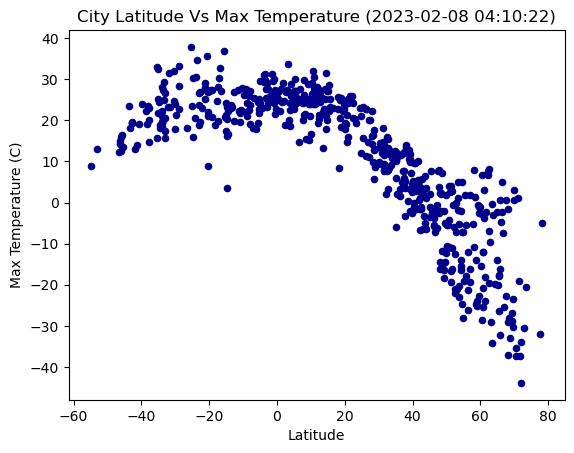

<Figure size 640x480 with 0 Axes>

In [8]:
# Build scatter plot for latitude vs. temperature
city_data_df.plot.scatter('Lat','Max Temp', c='DarkBlue')

#pd.to_datetime(df['date'], unit='s')
# Incorporate the other graph properties
city_data_df['Date'] = pd.to_datetime(city_data_df['Date'], unit='s')
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.title(f"City Latitude Vs Max Temperature ({city_data_df['Date'][0]})")
plt.show()

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
#plt.show()

#### Latitude Vs. Humidity

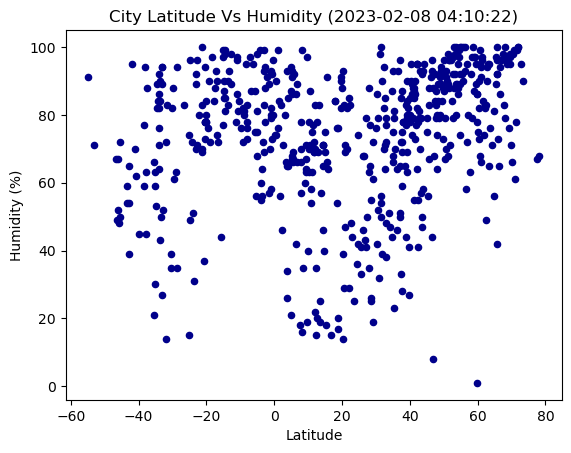

<Figure size 640x480 with 0 Axes>

In [13]:
# Build the scatter plots for latitude vs. humidity
city_data_df.plot.scatter('Lat','Humidity', c='DarkBlue')

#pd.to_datetime(df['date'], unit='s')
# Incorporate the other graph properties
#city_data_df['Date'] = pd.to_datetime(city_data_df['Date'], unit='s')
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title(f"City Latitude Vs Humidity ({city_data_df['Date'][0]})")
plt.show()

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

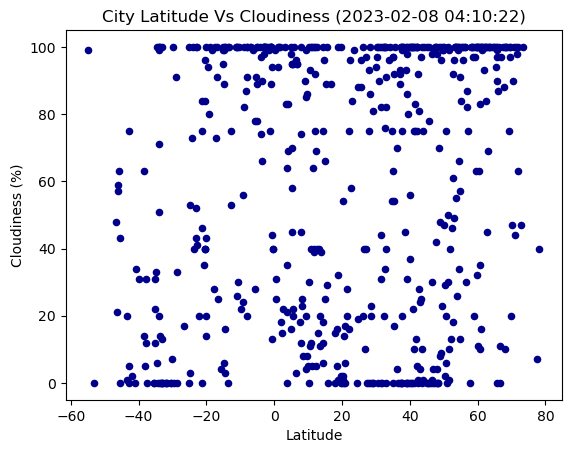

<Figure size 640x480 with 0 Axes>

In [14]:
# Build the scatter plots for latitude vs. cloudiness
city_data_df.plot.scatter('Lat','Cloudiness', c='DarkBlue')

#pd.to_datetime(df['date'], unit='s')
# Incorporate the other graph properties
#city_data_df['Date'] = pd.to_datetime(city_data_df['Date'], unit='s')
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title(f"City Latitude Vs Cloudiness ({city_data_df['Date'][0]})")
plt.show()

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

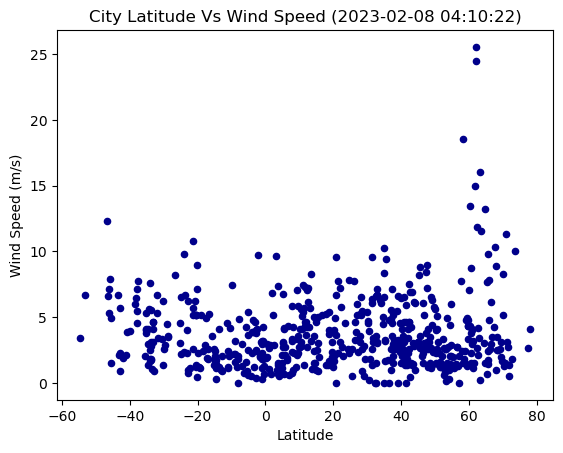

<Figure size 640x480 with 0 Axes>

In [15]:
# Build the scatter plots for latitude vs. wind speed
city_data_df.plot.scatter('Lat','Wind Speed', c='DarkBlue')

#pd.to_datetime(df['date'], unit='s')
# Incorporate the other graph properties
#city_data_df['Date'] = pd.to_datetime(city_data_df['Date'], unit='s')
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.title(f"City Latitude Vs Wind Speed ({city_data_df['Date'][0]})")
plt.show()
# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [16]:
# Define a function to create Linear Regression plots
def slope(x,y):
    return linregress(x, y)[0]

def intpt(x,y):
    return linregress(x, y)[1]

def corr(x,y):
    return linregress(x, y)[2]

In [17]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df=city_data_df[city_data_df['Lat']>=0]

# Display sample data
northern_hemi_df.head()
#northern_hemi_df.info()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,hailar,49.2000,119.7000,-18.33,94,96,1.38,C,2023-02-08 04:10:23
3,nanortalik,60.1432,-45.2371,-15.45,75,11,7.06,G,2023-02-08 04:10:24
4,porto novo,6.4965,2.6036,25.24,86,96,1.89,B,2023-02-08 04:10:25
6,aguimes,27.9054,-15.4461,14.35,63,75,3.60,E,2023-02-08 04:10:27
8,ledyard,41.4398,-72.0142,4.51,90,100,4.63,U,2023-02-08 04:10:31


In [18]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df=city_data_df[city_data_df['Lat']<0]

# Display sample data
southern_hemi_df.head()
#southern_hemi_df.info()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,atuona,-9.8000,-139.0333,26.13,76,22,7.43,P,2023-02-08 04:10:22
1,namatanai,-3.6667,152.4333,29.76,64,90,4.76,P,2023-02-08 04:10:23
5,hobart,-42.8794,147.3294,19.59,65,75,5.66,A,2023-02-08 04:05:17
7,ushuaia,-54.8000,-68.3000,8.79,91,99,3.44,A,2023-02-08 04:10:28
9,cidreira,-30.1811,-50.2056,23.95,82,7,6.20,B,2023-02-08 04:10:32


###  Temperature vs. Latitude Linear Regression Plot

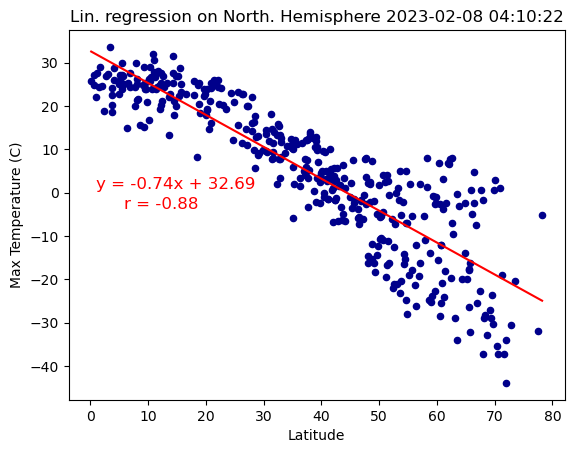

y = -0.74x + 32.69, r = -0.88


In [19]:
# Linear regression on Northern Hemisphere
northern_hemi_df.plot.scatter('Lat','Max Temp', c='DarkBlue')

plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
x_reg=northern_hemi_df['Lat']
y_reg=northern_hemi_df['Max Temp']
x_min=northern_hemi_df['Lat'].min()
x_max=northern_hemi_df['Lat'].max()
y1 = x_min * slope(x_reg,y_reg)+intpt(x_reg, y_reg)
y2 = x_max * slope(x_reg, y_reg)+intpt(x_reg, y_reg)
plt.plot([x_min, x_max], [y1, y2], color ='r')
line_eq = 'y = ' + str(round(slope(x_reg, y_reg),2)) + 'x + ' + str(round(intpt(x_reg, y_reg),2))
plt.annotate(line_eq, (5.8,0.8), xytext=(1,1),  fontsize=12, color="red")
plt.annotate(f'r = {str(round(corr(x_reg, y_reg),2))}', (5.8,-3.8), fontsize=12, color="red")
plt.title(f"Lin. regression on North. Hemisphere {city_data_df['Date'][0]}")
plt.show()
print(f'{line_eq}, r = {str(round(corr(x_reg, y_reg),2))}')


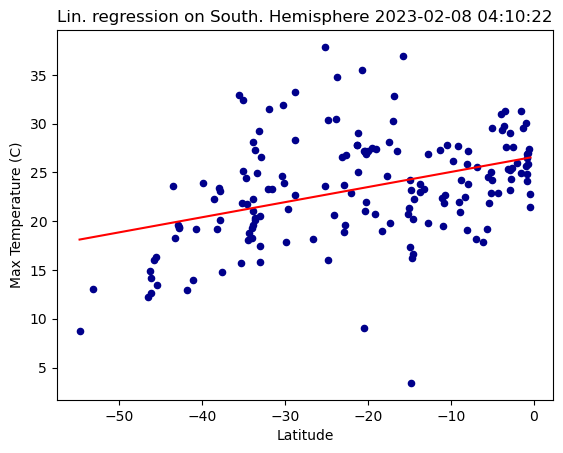

y = 0.15x + 26.6, r = 0.4


In [20]:
# Linear regression on Southern Hemisphere
southern_hemi_df.plot.scatter('Lat','Max Temp', c='DarkBlue')

plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
x_reg=southern_hemi_df['Lat']
y_reg=southern_hemi_df['Max Temp']
x_min=southern_hemi_df['Lat'].min()
x_max=southern_hemi_df['Lat'].max()
y1 = x_min * slope(x_reg,y_reg)+intpt(x_reg, y_reg)
y2 = x_max * slope(x_reg, y_reg)+intpt(x_reg, y_reg)
plt.plot([x_min, x_max], [y1, y2], color ='r')
line_eq = 'y = ' + str(round(slope(x_reg, y_reg),2)) + 'x + ' + str(round(intpt(x_reg, y_reg),2))
plt.annotate(line_eq, (5.8,-4.8), xytext=(10,5),  fontsize=12, color="red")
plt.annotate(f'r = {str(round(corr(x_reg, y_reg),2))}', (5.8,-6.8), fontsize=12, color="red")
plt.title(f"Lin. regression on South. Hemisphere {city_data_df['Date'][0]}")
plt.show()
print(f'{line_eq}, r = {str(round(corr(x_reg, y_reg),2))}')

**Discussion about the linear relationship:** YOUR RESPONSE HERE

The linear relationship between Latitude and Maximum Temperature is more evident for Northern Hemisphere. It's visible either on the charts or by computing the coefficient of determination: r^2(north) = 0.76 vs r^2(south) = 0.15 (the error of residuals). 
It means that if we move vertically from the Equator with highest temperature to North Pole temperature linearly decreasing. But, if we move from the Equator to Antarctica, the linear association is not so evident. I think it happened just because we don't have enough data at this part of the Earth (most of cities located on Northern Hemisphere (N: 388 cities vs S: 179 cities)).

### Humidity vs. Latitude Linear Regression Plot

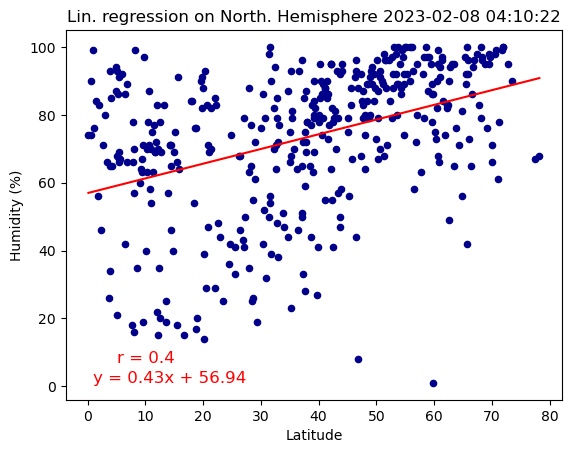

y = 0.43x + 56.94, r = 0.4


In [21]:
# Northern Hemisphere
northern_hemi_df.plot.scatter('Lat','Humidity', c='DarkBlue')
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
x_reg=northern_hemi_df['Lat']
y_reg=northern_hemi_df['Humidity']
x_min=northern_hemi_df['Lat'].min()
x_max=northern_hemi_df['Lat'].max()
y1 = x_min * slope(x_reg,y_reg)+intpt(x_reg, y_reg)
y2 = x_max * slope(x_reg, y_reg)+intpt(x_reg, y_reg)
plt.plot([x_min, x_max], [y1, y2], color ='r')
line_eq = 'y = ' + str(round(slope(x_reg, y_reg),2)) + 'x + ' + str(round(intpt(x_reg, y_reg),2))
plt.annotate(line_eq, (1,0.8), xytext=(1,1), fontsize=12, color="red")
plt.annotate(f'r = {str(round(corr(x_reg, y_reg),2))}', (5,6.8), fontsize=12, color="red")
plt.title(f"Lin. regression on North. Hemisphere {city_data_df['Date'][0]}")
plt.show()
print(f'{line_eq}, r = {str(round(corr(x_reg, y_reg),2))}')


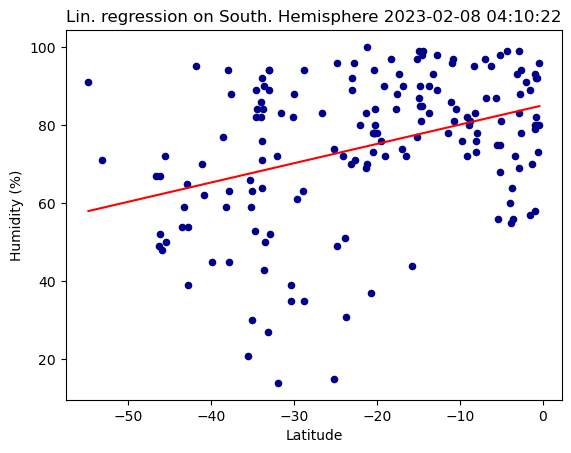

y = 0.49x + 85.05, r = 0.37


In [22]:
# Southern Hemisphere
southern_hemi_df.plot.scatter('Lat','Humidity', c='DarkBlue')

plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
x_reg=southern_hemi_df['Lat']
y_reg=southern_hemi_df['Humidity']
x_min=southern_hemi_df['Lat'].min()
x_max=southern_hemi_df['Lat'].max()
y1 = x_min * slope(x_reg,y_reg)+intpt(x_reg, y_reg)
y2 = x_max * slope(x_reg, y_reg)+intpt(x_reg, y_reg)
plt.plot([x_min, x_max], [y1, y2], color ='r')
line_eq = 'y = ' + str(round(slope(x_reg, y_reg),2)) + 'x + ' + str(round(intpt(x_reg, y_reg),2))
plt.annotate(line_eq, (1.8,-4.8), xytext=(1,1), fontsize=12, color="red")
plt.annotate(f'r = {str(round(corr(x_reg, y_reg),2))}', (1.8,-6.8), fontsize=12, color="red")
plt.title(f"Lin. regression on South. Hemisphere {city_data_df['Date'][0]}")
plt.show()
print(f'{line_eq}, r = {str(round(corr(x_reg, y_reg),2))}')

**Discussion about the linear relationship:** YOUR RESPONSE HERE

The linear relationship between Latitude and Humidity is not evident either for Northern or Southern Hemispheres. The coefficients of determination are r^2(north) = 0.22 and r^2(south) = 0.07. 
We can see a little relation while moving from the Equator with lowest humidity to North Pole with the highest one. Since the most of Northern Hemisphere is water, humidity is high almost everythere on this Hemisphere.


### Cloudiness vs. Latitude Linear Regression Plot

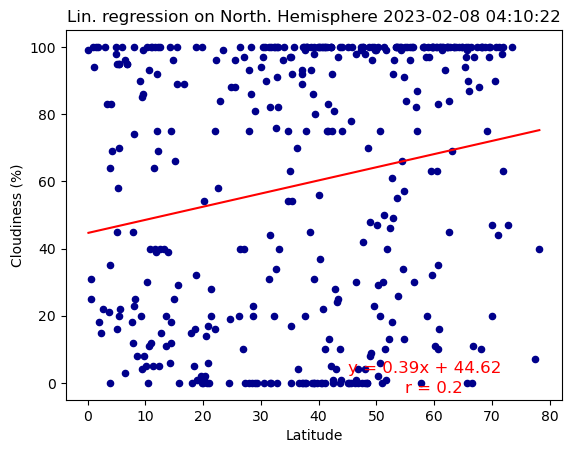

y = 0.39x + 44.62, r = 0.2


In [23]:
# Northern Hemisphere
northern_hemi_df.plot.scatter('Lat','Cloudiness', c='DarkBlue')
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
x_reg=northern_hemi_df['Lat']
y_reg=northern_hemi_df['Cloudiness']
x_min=northern_hemi_df['Lat'].min()
x_max=northern_hemi_df['Lat'].max()
y1 = x_min * slope(x_reg,y_reg)+intpt(x_reg, y_reg)
y2 = x_max * slope(x_reg, y_reg)+intpt(x_reg, y_reg)
plt.plot([x_min, x_max], [y1, y2], color ='r')
line_eq = 'y = ' + str(round(slope(x_reg, y_reg),2)) + 'x + ' + str(round(intpt(x_reg, y_reg),2))
plt.annotate(line_eq, (3.8,0.8), xytext=(45,3), fontsize=12, color="red")
plt.annotate(f'r = {str(round(corr(x_reg, y_reg),2))}', (55,-3), fontsize=12, color="red")
plt.title(f"Lin. regression on North. Hemisphere {city_data_df['Date'][0]}")
plt.show()
print(f'{line_eq}, r = {str(round(corr(x_reg, y_reg),2))}')


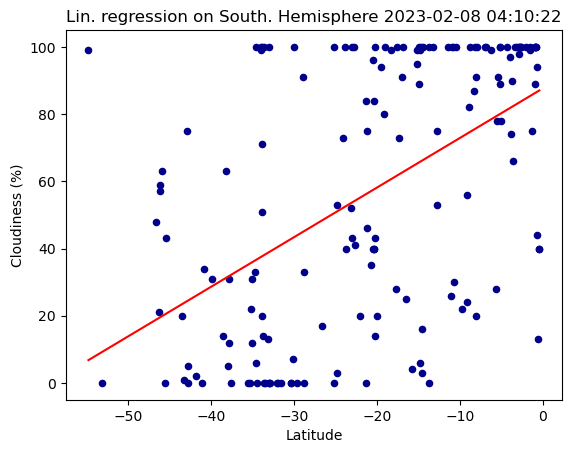

y = 1.48x + 87.66, r = 0.52


In [24]:
# Southern Hemisphere
southern_hemi_df.plot.scatter('Lat','Cloudiness', c='DarkBlue')

plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
x_reg=southern_hemi_df['Lat']
y_reg=southern_hemi_df['Cloudiness']
x_min=southern_hemi_df['Lat'].min()
x_max=southern_hemi_df['Lat'].max()
y1 = x_min * slope(x_reg,y_reg)+intpt(x_reg, y_reg)
y2 = x_max * slope(x_reg, y_reg)+intpt(x_reg, y_reg)
plt.plot([x_min, x_max], [y1, y2], color ='r')
line_eq = 'y = ' + str(round(slope(x_reg, y_reg),2)) + 'x + ' + str(round(intpt(x_reg, y_reg),2))
plt.annotate(line_eq, (5.8,-4.8), xytext=(1,1), fontsize=12, color="red")
plt.annotate(f'r = {str(round(corr(x_reg, y_reg),2))}', (5.8,-6.8), fontsize=12, color="red")
plt.title(f"Lin. regression on South. Hemisphere {city_data_df['Date'][0]}")
plt.show()
print(f'{line_eq}, r = {str(round(corr(x_reg, y_reg),2))}')

**Discussion about the linear relationship:** YOUR RESPONSE HERE

Any relationship between Latitude and Cloudiness is not evident for both Hemispheres. I wouldn't use any model (even nonlinear) to find the association between these two factors. The additional analysis is needed here.

### Wind Speed vs. Latitude Linear Regression Plot

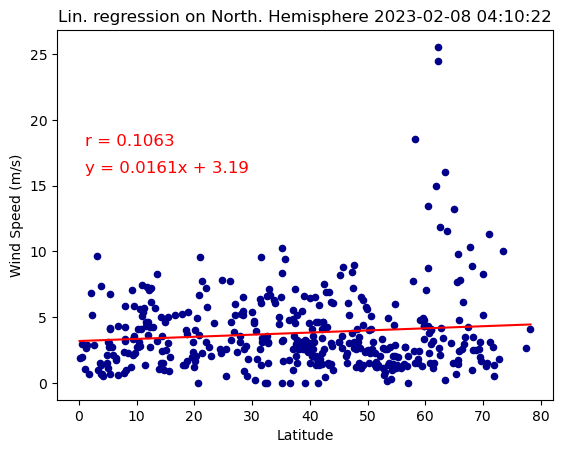

y = 0.0161x + 3.19, r = 0.1063


In [25]:
# Northern Hemisphere
northern_hemi_df.plot.scatter('Lat','Wind Speed', c='DarkBlue')
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
x_reg=northern_hemi_df['Lat']
y_reg=northern_hemi_df['Wind Speed']
x_min=northern_hemi_df['Lat'].min()
x_max=northern_hemi_df['Lat'].max()
y1 = x_min * slope(x_reg,y_reg)+intpt(x_reg, y_reg)
y2 = x_max * slope(x_reg, y_reg)+intpt(x_reg, y_reg)
plt.plot([x_min, x_max], [y1, y2], color ='r')
line_eq = 'y = ' + str(round(slope(x_reg, y_reg),4)) + 'x + ' + str(round(intpt(x_reg, y_reg),2))
plt.annotate(line_eq, (5.8,0.8), xytext=(1,16), fontsize=12, color="red")
plt.annotate(f'r = {str(round(corr(x_reg, y_reg),4))}', (1,5), xytext=(1,18),  fontsize=12, color="red")
plt.title(f"Lin. regression on North. Hemisphere {city_data_df['Date'][0]}")
plt.show()
print(f'{line_eq}, r = {str(round(corr(x_reg, y_reg),4))}')


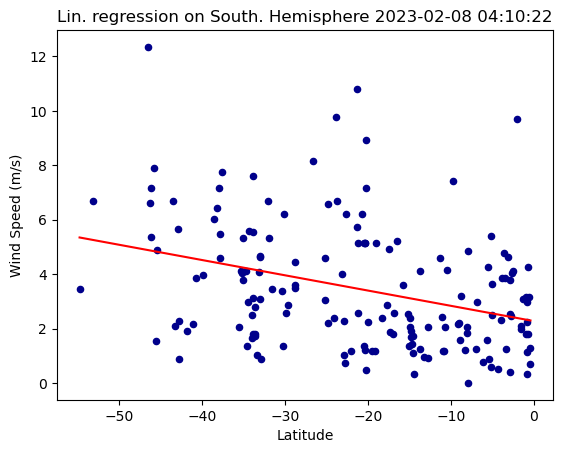

y = -0.06x + 2.27, r = -0.35


In [26]:
# Southern Hemisphere
southern_hemi_df.plot.scatter('Lat','Wind Speed', c='DarkBlue')

plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
x_reg=southern_hemi_df['Lat']
y_reg=southern_hemi_df['Wind Speed']
x_min=southern_hemi_df['Lat'].min()
x_max=southern_hemi_df['Lat'].max()
y1 = x_min * slope(x_reg,y_reg)+intpt(x_reg, y_reg)
y2 = x_max * slope(x_reg, y_reg)+intpt(x_reg, y_reg)
plt.plot([x_min, x_max], [y1, y2], color ='r')
line_eq = 'y = ' + str(round(slope(x_reg, y_reg),2)) + 'x + ' + str(round(intpt(x_reg, y_reg),2))
plt.annotate(line_eq, (5.8,-4.8), xytext=(1,20), fontsize=12, color="red")
plt.annotate(f'r = {str(round(corr(x_reg, y_reg),2))}', (5.8,-6.8), xytext=(1,18),  fontsize=12, color="red")
plt.title(f"Lin. regression on South. Hemisphere {city_data_df['Date'][0]}")
plt.show()
print(f'{line_eq}, r = {str(round(corr(x_reg, y_reg),2))}')

**Discussion about the linear relationship:** YOUR RESPONSE HERE

It's similar to the previous model, but in this model the coefficient of correlation close to zero for both Hemispheres. I would say that there is no linear relationship between Latitude and Wind Speed for both Hemispheres. The additional analysis is needed here.